### Importing Neccessary library

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

### Reading From the File

In [3]:
df = pd.read_csv('sales.csv')
df.head()

,order_id,product,quantity,price,date,address,month
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",August
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",August
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035",August
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",August
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",August


### checking the null values 

In [4]:
df.isnull().sum()

order_id    0
product     0
quantity    0
price       0
date        0
address     0
month       0
dtype: int64

##### describing the data

In [5]:
df.describe()

,order_id,product,quantity,price,date,address,month
count,186305,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788,12
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address,December
freq,355,21903,168552,21903,355,355,25037


##### preprocessing the order_id 

In [6]:
data = []
for i in df.values:
    if 'Order ID' not in i:
        data.append(i)                      # clearing the dataset and creating a new dataset 
        
data = pd.DataFrame(data,columns = ['order_id','product','quantity','price','date','address','month'])
data

,order_id,product,quantity,price,date,address,month
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",August
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",August
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035",August
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",August
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",August
...,...,...,...,...,...,...,...
185945,162004,Apple Airpods Headphones,1,150,02/12/19 22:02,"227 Church St, San Francisco, CA 94016",February
185946,162005,AAA Batteries (4-pack),2,2.99,02/04/19 20:44,"417 Jefferson St, Los Angeles, CA 90001",February
185947,162006,USB-C Charging Cable,1,11.95,02/24/19 06:31,"498 8th St, Atlanta, GA 30301",February
185948,162007,USB-C Charging Cable,1,11.95,02/24/19 19:09,"715 7th St, Dallas, TX 75001",February


##### preprocessing date

In [7]:
date  = []
time  = []

for i in data.values:
    date.append(i[4].split(' ')[0])           # getting the date 
    time.append(i[4].split(' ')[1])           # getting the time 
    
data['date'] = date
data['time'] = time

data.head()

,order_id,product,quantity,price,date,address,month,time
0,236670,Wired Headphones,2,11.99,08/31/19,"359 Spruce St, Seattle, WA 98101",August,22:21
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19,"492 Ridge St, Dallas, TX 75001",August,15:11
2,236672,iPhone,1,700.0,08/06/19,"149 7th St, Portland, OR 97035",August,14:40
3,236673,AA Batteries (4-pack),2,3.84,08/29/19,"631 2nd St, Los Angeles, CA 90001",August,20:59
4,236674,AA Batteries (4-pack),2,3.84,08/15/19,"736 14th St, New York City, NY 10001",August,19:53


##### further preprocessing the date and time column 

In [8]:
day   = []
month = []
year  = []

for i in data.values:
    month.append(int(i[4].split('/')[0]))                  # getting the month 
    day.append(int(i[4].split('/')[1]))                    # gettting the day  
    year.append(int('20'+i[4].split('/')[2]))              # getting the year 



data['day']   = day
data['month_'] = month
data['year']  = year


data.head()

,order_id,product,quantity,price,date,address,month,time,day,month_,year
0,236670,Wired Headphones,2,11.99,08/31/19,"359 Spruce St, Seattle, WA 98101",August,22:21,31,8,2019
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19,"492 Ridge St, Dallas, TX 75001",August,15:11,15,8,2019
2,236672,iPhone,1,700.0,08/06/19,"149 7th St, Portland, OR 97035",August,14:40,6,8,2019
3,236673,AA Batteries (4-pack),2,3.84,08/29/19,"631 2nd St, Los Angeles, CA 90001",August,20:59,29,8,2019
4,236674,AA Batteries (4-pack),2,3.84,08/15/19,"736 14th St, New York City, NY 10001",August,19:53,15,8,2019


##### further preprocessing time column and deleting the time column

In [9]:
hour = []
for i in data.values:
    hour.append(i[7].split(':')[0])              # getting the hour

data['hour'] = hour
data.head()

,order_id,product,quantity,price,date,address,month,time,day,month_,year,hour
0,236670,Wired Headphones,2,11.99,08/31/19,"359 Spruce St, Seattle, WA 98101",August,22:21,31,8,2019,22
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19,"492 Ridge St, Dallas, TX 75001",August,15:11,15,8,2019,15
2,236672,iPhone,1,700.0,08/06/19,"149 7th St, Portland, OR 97035",August,14:40,6,8,2019,14
3,236673,AA Batteries (4-pack),2,3.84,08/29/19,"631 2nd St, Los Angeles, CA 90001",August,20:59,29,8,2019,20
4,236674,AA Batteries (4-pack),2,3.84,08/15/19,"736 14th St, New York City, NY 10001",August,19:53,15,8,2019,19


##### adding total amount column

In [10]:
tot_amt = []
for i in data.values:
    tot_amt.append(float(i[2])* float(i[3]))     # getting total amount
    
data['tot_amt'] = tot_amt
data.head()

,order_id,product,quantity,price,date,address,month,time,day,month_,year,hour,tot_amt
0,236670,Wired Headphones,2,11.99,08/31/19,"359 Spruce St, Seattle, WA 98101",August,22:21,31,8,2019,22,23.98
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19,"492 Ridge St, Dallas, TX 75001",August,15:11,15,8,2019,15,99.99
2,236672,iPhone,1,700.0,08/06/19,"149 7th St, Portland, OR 97035",August,14:40,6,8,2019,14,700.00
3,236673,AA Batteries (4-pack),2,3.84,08/29/19,"631 2nd St, Los Angeles, CA 90001",August,20:59,29,8,2019,20,7.68
4,236674,AA Batteries (4-pack),2,3.84,08/15/19,"736 14th St, New York City, NY 10001",August,19:53,15,8,2019,19,7.68


##### preprocessing the address column 

In [11]:
shop_no  = []
street    = []
city      = []
city_code = []
pincode   = []
for i in data.values:
    shop_no.append(i[5].split(',')[0].strip().split(' ')[0])                                                  # getting the shop number 
    street.append(i[5].split(',')[0].strip().split(' ')[1] + ' ' +i[5].split(',')[0].strip().split(' ')[-1])  # getting the street address
    city.append(i[5].split(',')[1].strip())                                                                   # getting the city 
    city_code.append(i[5].split(',')[-1].strip().split(' ')[0])                                               # getting the city code
    pincode.append(i[5].split(',')[-1].strip().split(' ')[-1])                                                # getting the pincode

data['shop_no']    = shop_no           # adding the shop number to the dataset
data['street']     = street            # adding the street address to the dataset
data['city']       = city              # adding the city to the dataset
data['city_code']  = city_code         # adding the city code address to the dataset
data['pincode']    = pincode           # adding the pincode address to the dataset

data.head()

,order_id,product,quantity,price,date,address,month,time,day,month_,year,hour,tot_amt,shop_no,street,city,city_code,pincode
0,236670,Wired Headphones,2,11.99,08/31/19,"359 Spruce St, Seattle, WA 98101",August,22:21,31,8,2019,22,23.98,359,Spruce St,Seattle,WA,98101
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19,"492 Ridge St, Dallas, TX 75001",August,15:11,15,8,2019,15,99.99,492,Ridge St,Dallas,TX,75001
2,236672,iPhone,1,700.0,08/06/19,"149 7th St, Portland, OR 97035",August,14:40,6,8,2019,14,700.00,149,7th St,Portland,OR,97035
3,236673,AA Batteries (4-pack),2,3.84,08/29/19,"631 2nd St, Los Angeles, CA 90001",August,20:59,29,8,2019,20,7.68,631,2nd St,Los Angeles,CA,90001
4,236674,AA Batteries (4-pack),2,3.84,08/15/19,"736 14th St, New York City, NY 10001",August,19:53,15,8,2019,19,7.68,736,14th St,New York City,NY,10001


##### Removing the unneccesary column

In [12]:
del data['time']        
del data['date']

In [13]:
data.head()

,order_id,product,quantity,price,address,month,day,month_,year,hour,tot_amt,shop_no,street,city,city_code,pincode
0,236670,Wired Headphones,2,11.99,"359 Spruce St, Seattle, WA 98101",August,31,8,2019,22,23.98,359,Spruce St,Seattle,WA,98101
1,236671,Bose SoundSport Headphones,1,99.99,"492 Ridge St, Dallas, TX 75001",August,15,8,2019,15,99.99,492,Ridge St,Dallas,TX,75001
2,236672,iPhone,1,700.0,"149 7th St, Portland, OR 97035",August,6,8,2019,14,700.00,149,7th St,Portland,OR,97035
3,236673,AA Batteries (4-pack),2,3.84,"631 2nd St, Los Angeles, CA 90001",August,29,8,2019,20,7.68,631,2nd St,Los Angeles,CA,90001
4,236674,AA Batteries (4-pack),2,3.84,"736 14th St, New York City, NY 10001",August,15,8,2019,19,7.68,736,14th St,New York City,NY,10001


##### pre-processing the hour column 

In [14]:
am_pm = []
for h in data['hour']:            
    if int(h) > 12:                   # check if pm present or not
        am_pm.append('P.M.')             
    elif int(h) <= 12:
        am_pm.append('A.M.')         # check if am present or not 
data['time_'] = am_pm
data.head()


,order_id,product,quantity,price,address,month,day,month_,year,hour,tot_amt,shop_no,street,city,city_code,pincode,time_
0,236670,Wired Headphones,2,11.99,"359 Spruce St, Seattle, WA 98101",August,31,8,2019,22,23.98,359,Spruce St,Seattle,WA,98101,P.M.
1,236671,Bose SoundSport Headphones,1,99.99,"492 Ridge St, Dallas, TX 75001",August,15,8,2019,15,99.99,492,Ridge St,Dallas,TX,75001,P.M.
2,236672,iPhone,1,700.0,"149 7th St, Portland, OR 97035",August,6,8,2019,14,700.00,149,7th St,Portland,OR,97035,P.M.
3,236673,AA Batteries (4-pack),2,3.84,"631 2nd St, Los Angeles, CA 90001",August,29,8,2019,20,7.68,631,2nd St,Los Angeles,CA,90001,P.M.
4,236674,AA Batteries (4-pack),2,3.84,"736 14th St, New York City, NY 10001",August,15,8,2019,19,7.68,736,14th St,New York City,NY,10001,P.M.


##### Classification of sales based on A.M./P.M.

In [15]:
data_am = data[data['time_'] == 'A.M.']               # selecting the data with am 
data_pm = data[data['time_'] == 'P.M.']               # selecting the data with pm 

data_pm.to_csv('PM.csv',index = False)                # saving the pm.csv file with pm data
data_am.to_csv('AM.csv',index = False)                # saving the am.csv file with am data

##### Classification based on months 

In [16]:
monthly = []
for months in df['month'].unique():
    c          = 0
    amount     = 0
    tot_quant  = 0
    for j in data.values:
        if months in j:
            c += 1
            tot_quant += int(j[2])
            amount += j[10]
    monthly.append([months,c,tot_quant,round(amount,2)])
    
# saving the data 
monthly = pd.DataFrame(monthly,columns = ['months','total_sales','total_quantity','total_amount'])
monthly.to_csv('monthy.csv',index = False)

In [17]:
data.head(1)

,order_id,product,quantity,price,address,month,day,month_,year,hour,tot_amt,shop_no,street,city,city_code,pincode,time_
0,236670,Wired Headphones,2,11.99,"359 Spruce St, Seattle, WA 98101",August,31,8,2019,22,23.98,359,Spruce St,Seattle,WA,98101,P.M.


In [18]:
data['address'].nunique()

140787

In [ ]:
address = []
for addresses in data['address'].unique():          # searching in all the unique addresses
    c = 0
    for i in df.values:                       
        if addresses in i[4] :
            c += 1
    address.append([addresses,c])

#  creating the dataframe
address = pd.DataFrame(address,columns =['address','count'])
address = address.sort_values(by='count',ascending = False ).head()          # Sorting the values 

##### Product sales 

In [22]:
products_sales = []

for products in data['product'].unique():
    c         = 0
    tot       = 0
    price     = 0
    tot_quant = 0
    
    for j in data.values:
        if products in j:
            c += 1
            tot_quant += int(j[2])
            tot += j[10]
            price = j[3]
    products_sales.append([products,c,tot_quant,price,round(tot,2)])

product_sales = pd.DataFrame(products_sales,columns = ['product','total_prod_sold_to','total_quantity_sold','price_per_prod','total_amount'])
product_sales.to_csv('product_sale.csv',index = False)

# Data Visualization of am and pm data 

In [19]:
time_data = data.groupby(data['time_']).sum()

/tmp/ipykernel_3744/3478460807.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  time_data = data.groupby(data['time_']).sum()


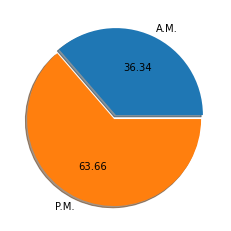

In [24]:
# comparison of sales or total amount collected in that particular time period
plt.pie(time_data['tot_amt'],labels =['A.M.','P.M.'],autopct = '%1.2f',explode = [0,0.05],shadow = True)
plt.show()